# Seminar 3

## Part 1 :  Data preparation & analysis


In [88]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [89]:
#Load data

df_labels = pd.read_csv('labels_data.csv', header=None)
display(df_labels.head(5))

df_rssi = pd.read_csv('rssi_data.csv', header=None)
display(df_rssi.head(5))

,0
0,5
1,4
2,5
3,2
4,2


,0,1,2
0,-21.949,-99.659,-42.257
1,-34.049,-95.964,-47.779
2,-18.861,-100.000,-34.175
3,-53.497,-77.368,-67.360
4,-54.986,-73.012,-69.780


In [90]:
df_rssi.columns = ['AP1', 'AP2', 'AP3']
df_labels.columns = ['Position']

df_combined = pd.concat([df_rssi, df_labels], axis=1)

# Ploty express is used for interactive 3D scatter plot
# Is needed to install plotly using "pip install plotly" (if not already installed)
# Create an interactive 3D scatter plot with color by position
fig = px.scatter_3d(df_combined, 
                    x='AP1', 
                    y='AP2', 
                    z='AP3', 
                    color= 'Position',
                    labels={'AP1': 'AP1 RSSI', 'AP2': 'AP2 RSSI', 'AP3': 'AP3 RSSI'},
                    title='Interactive 3D Scatter Plot Colored by Position')
fig.update_traces(marker=dict(size=2))
fig.show()

In [91]:
display(df_rssi.head(5))

,AP1,AP2,AP3
0,-21.949,-99.659,-42.257
1,-34.049,-95.964,-47.779
2,-18.861,-100.000,-34.175
3,-53.497,-77.368,-67.360
4,-54.986,-73.012,-69.780


In [92]:
# Create a 2D scatter plot for each pair of APs
# AP1 vs AP2
fig1 = px.scatter(df_combined,
                  x='AP1',
                  y='AP2',
                  color='Position',
                  labels={'AP1': 'AP1 RSSI', 'AP2': 'AP2 RSSI'},
                  title='Interactive 2D Scatter Plot: AP1 vs AP2',
                  width=500,
                  height=400)
fig1.update_traces(marker=dict(size=4))
fig1.show()

# AP1 vs AP3
fig2 = px.scatter(df_combined,
                  x='AP1',
                  y='AP3',
                  color='Position',
                  labels={'AP1': 'AP1 RSSI', 'AP3': 'AP3 RSSI'},
                  title='Interactive 2D Scatter Plot: AP1 vs AP3',
                  width=500,
                  height=400)
fig2.update_traces(marker=dict(size=4))
fig2.show()

# AP2 vs AP3
fig3 = px.scatter(df_combined,
                  x='AP2',
                  y='AP3',
                  color='Position',
                  labels={'AP2': 'AP2 RSSI', 'AP3': 'AP3 RSSI'},
                  title='Interactive 2D Scatter Plot: AP2 vs AP3',
                  width=500,
                  height=400)
fig3.update_traces(marker=dict(size=4))
fig3.show()

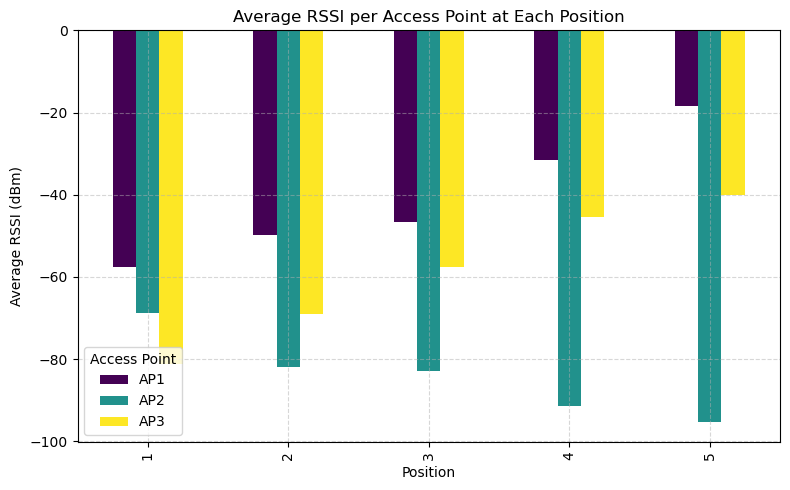

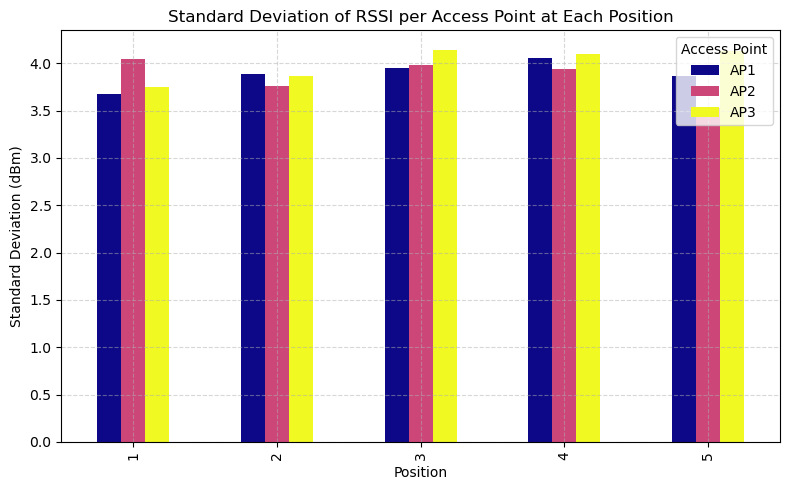

In [93]:
# Average RSSI and the standard deviation plot
# Group by position and compute mean and standard deviation
rssi_means = df_combined.groupby('Position').mean()
rssi_stds = df_combined.groupby('Position').std()

# Plot average RSSI per AP for each position
fig_mean, ax1 = plt.subplots(figsize=(8, 5))
rssi_means.plot(kind='bar', ax=ax1, colormap='viridis')
ax1.set_title('Average RSSI per Access Point at Each Position')
ax1.set_ylabel('Average RSSI (dBm)')
ax1.set_xlabel('Position')
ax1.legend(title='Access Point')
ax1.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Plot standard deviation of RSSI per AP for each position
fig_std, ax2 = plt.subplots(figsize=(8, 5))
rssi_stds.plot(kind='bar', ax=ax2, colormap='plasma')
ax2.set_title('Standard Deviation of RSSI per Access Point at Each Position')
ax2.set_ylabel('Standard Deviation (dBm)')
ax2.set_xlabel('Position')
ax2.legend(title='Access Point')
ax2.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

## Part 2 : k-means implementation


In [ ]:
def initialize_centroids(df, k):
    """
    Initialize centroids randomly from the dataset.
    """
    return df.sample(n=k).reset_index(drop=True)

def assign_clusters(df, centroids):
    """
    Assign each point in the dataset to the closest centroid.
    """
    distances = np.linalg.norm(df.values[:, None] - centroids.values, axis=2)
    return np.argmin(distances, axis=1)


def update_centroids(df, labels, k):
    """
    Update centroids based on the mean of the assigned clusters.
    """
    centroids = []
    for i in range(k):
        cluster_points = df[labels == i]
        if len(cluster_points) > 0:
            centroids.append(cluster_points.mean().values)
        else:
            # Handle empty clusters by reinitializing randomly
            centroids.append(df.sample(n=1).values[0])
    return pd.DataFrame(centroids, columns=df.columns)


def has_converged(old_labels, new_labels, iteration, max_iterations):
    """
    Check if the centroids have converged.
    """
    return np.array_equal(old_labels, new_labels) or iteration >= max_iterations

def k_means(df, k, max_iterations=100):
    """
    Perform k-means clustering on the dataset.
    """
    # Initialize centroids
    centroids = initialize_centroids(df, k)
    labels = np.zeros(len(df))
    iteration = 0

    while True:
        # Assign clusters
        new_labels = assign_clusters(df, centroids)

        # Check for convergence
        if has_converged(labels, new_labels, iteration, max_iterations):
            break

        # Update centroids
        centroids = update_centroids(df, new_labels, k)

        # Update labels and iteration count
        labels = new_labels
        iteration += 1

    return labels, centroids

In [ ]:
k = 3  # Number of clusters
labels, centroids = k_means(df_rssi, k)

print("Final Centroids:")
print(centroids)

print("Cluster Assignments:")
print(labels)


Final Centroids:
         AP1        AP2        AP3
0 -57.324616 -69.142263 -80.853200
1 -24.921362 -93.428550 -42.730757
2 -48.112927 -82.643197 -62.922654
Cluster Assignments:
[1 1 1 ... 2 1 1]
